In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.utils import get_file
from tensorflow.keras.preprocessing import image

In [3]:
# Load model
model = VGG16(weights='imagenet')

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 462s 1us/step


3028/3028 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step

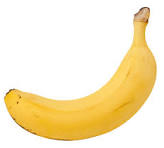

In [13]:
# Load and preprocess image
img_url ="data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAJQApAMBEQACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAAAwQBAgUGB//EADkQAAIBAwEFBAgFAwUBAAAAAAABAgMEESEFEjFBUQZhcaETFCIzQlKRsSMygZLB0eHwNGJyc/EV/8QAGgEBAAIDAQAAAAAAAAAAAAAAAAIEAQMFBv/EAC4RAQACAgEDBAECBQUBAAAAAAABAgMRBBIhMQUyQVETIqEUUmFxsSMzgcHhQv/aAAwDAQACEQMRAD8A+4gAAAAAAAAAAAAAAAAAABHWr0qFN1K9SFOnHjOckkvFgQ2W0rC/3vUb23ud383oasZ4+jMRMT4ZmJjytGWAAAAAAAAAAAAAAAAAAAAK9/eULC1qXN1PcpU1mTw35IxM6jbMRMzqHgtr15do72jWnSqRs6L/AAqM3o3znJcM9CnkyzadR4W6Y4pHfyt7FpQn2ks6tOKj6JVIrHHdcXp4Zx9DVhy/60VhLLX/AEp29yuB0lFkAAAAAAAAAAAAAAAAAAAOV2lUp7NdOKT35xTT6cf4K3Lv0Y9t2CN3eRvlcUqP4VNrTGVjTzOTbkzC/WlVnsLOtc7VvJ1aclC3pRjCclhylJ+19l5lvgzTJebR3008vdYiPt7o6igAAAAAAAAAAAAAAAAAAABS2sk7OWeTTX1KnN/2Zluwe+HmL73emh56/h0aO/2btYW+yqTisSq+3LvfLyO96djinHrMfPdz+RabZJdUvNAAAAAAAAAAAAAAAAAAAAFHa8sWjXVpfz/BR9QnWGf+G7jxu7zV4tGeftO4dGr0+yHnZlr/ANUV9Eel4c749P7Q5mWNXlcLLWAAAAAAAAAAAAAAAAAAAByNt1suFKOrXtPBxvVM3jHC3xaf/TjV05N6HI8rsadjs5cKVrKhLO9TeifR/wCM7vpmbqx/jnzH+FHlU1fq+3YOmqgAAAAAAAAAAAAAAAAAAhua0aFGU5cuHeac2aMVJtKVKTe2ocCdRzqSnJ5k+LPNZLza02t5dKtdRqEUnqYrKSOnWlbXEa1P4eK+ZdDbiyTivF6/DF6xevTL1dGpGrShUh+WSyj0tLRasWjxLlzE1nUtyTAAAAAAAAAAAAAAAAAxkDibRuHWrbsPyQ08Wef9Q5H5MnTHiF/j4+mu/tSkktOfU5tvKzCGrnDSJEIZPVZ6Gzeh3OzlbfoVKL405ZXg/wDGdn03Juk0+lHlV1aJdk6aqAAAAAAAAAAAAAAAAKm0bj1ei91+3LRFPncj8GKZjzPhtw4+uzhrv/U81Hfy6SFz35NrhnQjvcpa1DSo9SbGkM+DJ/A6PZhv12us6OmvudL0uf12j+ity/bD0p21AAAAAAAAAAAAAAAA0q1I0oOc3iMeJC960rNrfDMRNp1Dg3NaVxVdR8OEV0R5jkZ7Z8nXPh0sdIpXSvcNqm1B4k9EV7TqG2PKt7uCjHOhH2wn5lHKXUVklpKSwbepHTrdl45r3E/9sUdb0uv6rWU+XPaIejOypAGMgEBkAAAAAAAAAA0q1Y0oOc2lFc2QyZK469VpZrWbTqHFvbqVxLCzGmuC6nnuXy5zzqPa6GLFFI/qrZSXRFNuQSlvSz5EN7naWtIajRCyUKtSbya5slprnJvp3Rl6rs9QdKwU2vaqy3v04I9J6dj6cO5+XM5Nt319OqX1dR2xtBbMsaly6U6rjhRpwxmcm8Ja8PE1ZstMNJvee0J0pN7dMPI0nfXNSVzeXlx6Sc/SRpU6slTo9IpLGcZ48zzGT1fJkvPTOqunXjUrHeO7r2e1rik3CU1WUeKl+ZfqW8HqOWvmdw1ZONSfHZ0IbaptfiUpR8HkvV9TpPujX7tE8W3xK3Rvres1uVVno9C3j5WHJ7bNNsV6+YWUyw1sgAAADDYFO42hSo5UXvy6Lh9Sjn5+LFuInct1MFrOXXuKlxLNR8OCXA4mfkZM07uu0x1p4Q5S4lfbYinLPgQmdpxCKUkkYmWVWpUy8GmbblLSJk4qbT2NvK7uYUIfE9X0XNl3j4Zy3ikfLTlv01mXt6cIwhGMVhJYSPVRERGociZ35bGRwu1FJzVvUy92Lkscstf2Zw/XIvOKuvG+67wpjqlyKaSR5utIh0JlFbxo3FWV1T396O9S1ylo9dOeq49xY71hiUst5cc4H5ZjyRVtTa+ZPxN9MlZ+ULQt0LqvR93VkkuT1Rax8nLj9tmm2KtvMLkNrVl7ynCXhoW6+p5I90RP7NM8avxKVbXjzov9xuj1Sv8AKj/CT9s//XXKi/3CfVI+Kn8JP2jntWq17EIx8zTf1PJPtiITji1+ZVKtzWraVKja6cill5OXJ7rN1cVK+IRFZsYc1HnqJtEM6Ryk2Q3LOkcpYRiZZhUr3EY8ZJGm1vhOIVlUc5JrOO8RG5JS55ss1jXlCXq9g7P9VoOrVX41RftXQ9HwON+KnVbzP+HM5GXrtqPEOquB0FdkCntS39ZsqtOOssb0fFalbl4fzYbUbMN+i8S8pRlLVzxx0XQ8bEfbsysRly5EkWHlviR0y0lST1jx6ohOP6ZizVSnF8ckoverMxEpY1eqNsZo+YQmjdTj8xsjJX7Q6Zbb0VzRnrj7NMOpFfEjH5IZ6WsqvTiYm/0zFUbnOT6I19UylqIMobGs54QmTSlWuMvdgter4I02v30nEaQRpre3pvfl1fIUgmfpLwLFY0g7nZ/Znppxuq6/DX5E/ifU7Pp/E65/Lfx8KXJzdP6K+XpzuqAAAAeQ7RU1s27VaXs21xLEZY0jN8n48v1PO+pcLov+WnifLpcXN1V6J8wrqfA46229JoY2zppvzjLRJr7Ed6NN/SJmeqGNNk4vuJeWGdDOoDCGoGMoyMOSMbGkqmCMyzpHOqRmzOkEp7xjcyyjEUGy79CxWNRuUJdnY2xpXTVxcxao8o85/wBjq8LgTlmL5Pb/AJ/8VM/Iiv6a+XqoxUYqMUkksJI9BEREahzmTIAAAEF5bUru3nQuI71OaxJZx/4+8jesXrNbeGYmYncPFbUt6uxqiV227WTxC6xiPcpfK/J+R5nmenXwz1U71dTDyK3jU+WFNPg01yOZMd1nbDkQtDLG80aunQ2VTBOtpGfSkuuTTPpR+RjTV1e8dcyzpo6hHcjRzbHeRrJslFRqstk4ruWElGnOrUVOjCU5vlFZZupSb26aRuUbTERuZel2VsGNKUa15iVRcILgvHqd7iemRSevL3n6+nPzcnfanh3loddTAAAAAAAaVaUK1OVOrCM4SWJRkspro0YmN+R5m/7K4k6myq0qSx/p5ye5x+F/D5nL5Pplb98faf2XcXLmO1+7j1YXdtOcb2yrW+OE5YlCXhJaHE5HDyYPdHZdx5aX8Sxvby08inMdm1hM11rJsfmS6Bh+I6Jg2zjQlFGNsLHEzFO5thtc2iXTEMJLe2uLtpW1GdRPnFafU3Y8GXL/ALddoWyVp7pdiz7NVpNSu6iprnCGr+p08HpF575Z1/ZWycyI9kbegsrK3s4btClGHV834vmdrDgx4a6pGlG+S15/VKybkAAAAAAAAAAAxJZ48DEwOfc7E2fde9t4qXzQ9l+RVy8Dj5fdX/pupyMlPEudV7KxWfVr+tDuqQjNL7FSfR8PxMt0c2/zCpPsztJZ3L21n03qUl9maZ9H79r/ALJ/xsfyo12b2pn2qlljulP+hC3o1vi0JRzafSxT7MXDxv3VJdd2DYr6Nb5v+zE82Piq1S7L0E81rmrP/ilH+pZp6Phj3WmWu3NvPiF+32Ls+3w4W0JNc6ntvzLuPh4Mftq0Wz5LeZXlHHAsNTYyAAAAAAAAAAAAAAAAAAwAAAAAAAAAAAAAAB//2Q=="
img_path = get_file('banana.jpg', origin=img_url)# Example image
img = image.load_img(img_path, target_size=(224, 224))

In [15]:
img_array = preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))

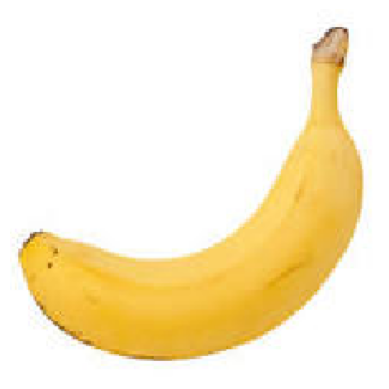

In [17]:
# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [19]:
# Predict
preds = decode_predictions(model.predict(img_array), top=3)[0]
for i, (_, label, score) in enumerate(preds):
    print(f"{i+1}: {label} ({score*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
1: banana (99.00%)
2: hook (0.28%)
3: spaghetti_squash (0.11%)
